
Cloud Counselage - Data Analytics Intern

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's in a CSV file named 'student_data.csv')
data = pd.read_csv('Data analyst Data.csv')

**Basic Questions**


1. How many unique students are included in the dataset?

In [ ]:
# Find unique students based on First Name and Email ID columns
unique_students = data.drop_duplicates(subset=['First Name', 'Email ID'])

# Count the number of unique students
num_unique_students = unique_students.shape[0]
print("1. Unique Students:", num_unique_students)

1. Unique Students: 2324


*There are total 2324 unique students in the dataset.*

2. What is the average GPA of the students?

In [ ]:
average_gpa = data['CGPA'].mean()
print("2. Average CGPA:", average_gpa)

2. Average GPA: 8.038475684511647


*The average CGPA of the students is 8.03.*

3. What is the distribution of students across different graduation years?

In [ ]:
graduation_year_distribution = data['Year of Graduation'].value_counts()
print("3. Graduation Year Distribution:\n", graduation_year_distribution)

3. Graduation Year Distribution:
 2023    1536
2024    1511
2025    1292
2026     555
Name: Year of Graduation, dtype: int64


*There are 1536 students graduated in the year 2023, 1511 students will be graduating in the year 2024, 1292 students will be graduating in the year 2025 and 555 students will be graduating in the year 2026.*

4. What is the distribution of student's experience with Python programming?

In [ ]:
python_experience_distribution = data['Experience with python (Months)'].value_counts()
print("4. Python Experience Distribution:\n", python_experience_distribution)

4. Python Experience Distribution:
 5    1242
3    1008
8     800
6     738
7     640
4     466
Name: Experience with python (Months), dtype: int64


*There are a total of 1242, 1008, 800, 738, 640 and 466 students having the experience of 5, 3, 8, 6, 7 and 4 years respectively with the python programming.*

5. What is the average family income of the student?

In [ ]:
def convert_income_range(income_range):
    income_range = income_range.replace('Lakh', '').strip()
    if '+' in income_range:
        return float(income_range.strip('+'))
    else:
        min_income, max_income = map(int, income_range.split('-'))
        return (min_income + max_income) / 2

# Apply the conversion function to the "Family Income" column
data['Numerical Family Income'] = data['Family Income'].apply(convert_income_range)

# Calculate the average family income
average_family_income = data['Numerical Family Income'].mean()

print("Average Family Income:", average_family_income)

Average Family Income: 1.2930118512464241


*The average family income of the students is Rs. 1.29 LPA.*

6. How does the GPA vary among different colleges? (Show top 5 results only)

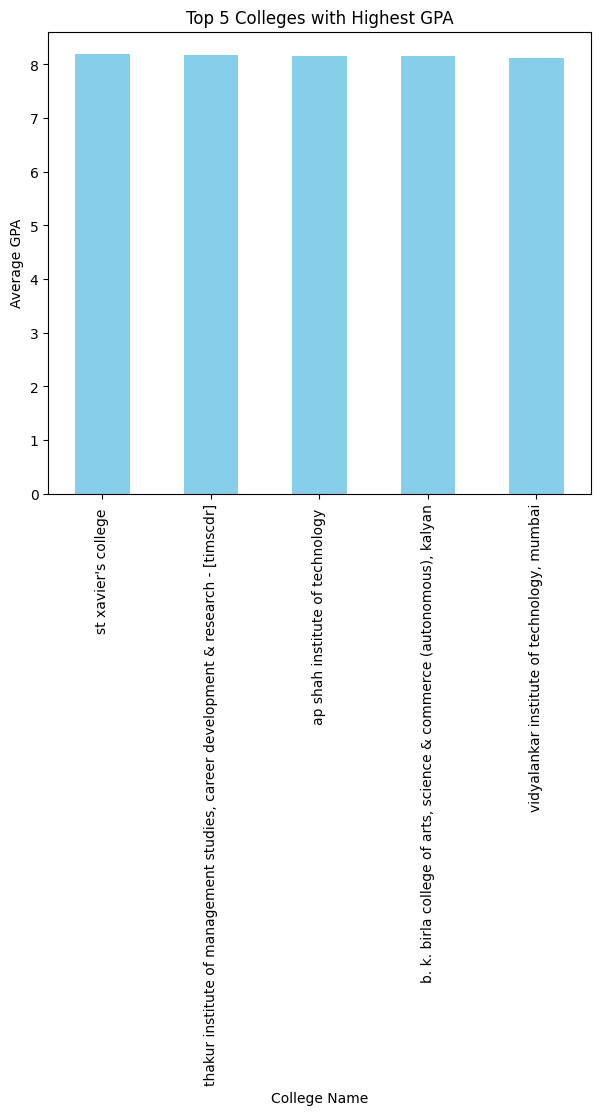

In [ ]:
# Group by college and calculate the mean GPA
data['College Name'] = data['College Name'].str.lower()
college_gpa = data.groupby('College Name')['CGPA'].mean().nlargest(5)

# Create a bar graph
plt.figure(figsize=(7, 6))
college_gpa.plot(kind='bar', color='skyblue')
plt.xlabel('College Name')
plt.ylabel('Average GPA')
plt.title('Top 5 Colleges with Highest GPA')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

*The top 5 colleges having the highest CGPA as 8 are St. Xaviers College, TIMSCDR, AP Shah Institute of Technologies, B.K. Birla and Vidyalankar Institute of Technology.*

7. Are there any outliers in the quantity (number of courses completed) attribute?

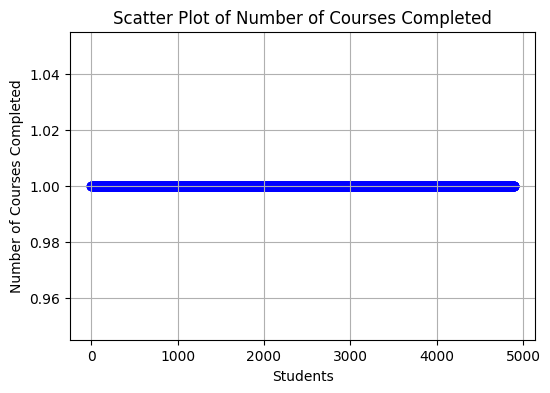

In [ ]:
# Create a scatter plot to visualize outliers
plt.figure(figsize=(6, 4))
plt.scatter(range(1, len(data) + 1), data['Quantity'], c='blue', marker='o')
plt.xlabel('Students')
plt.ylabel('Number of Courses Completed')
plt.title('Scatter Plot of Number of Courses Completed')
plt.grid(True)
plt.show()

*There are no outliers in the quantity (number of courses completed) attribute.*

8. What is the average GPA for students from each city?

In [ ]:
average_gpa_by_city = data.groupby('City')['CGPA'].mean()
print("8. Average CGPA by City:\n", average_gpa_by_city)

8. Average CGPA by City:
 City
Agartala     7.660714
Agra         8.046429
Ahemdabad    8.190385
Ajmer        8.284314
Akola        8.021429
               ...   
Vidisha      7.738095
Vijaywada    7.986364
Wardha       8.328571
konark       8.071429
kullu        7.878571
Name: CGPA, Length: 177, dtype: float64


*The average CGPA for students from each city is calculated.*

9. Can we identify any relationship between family income and GPA?

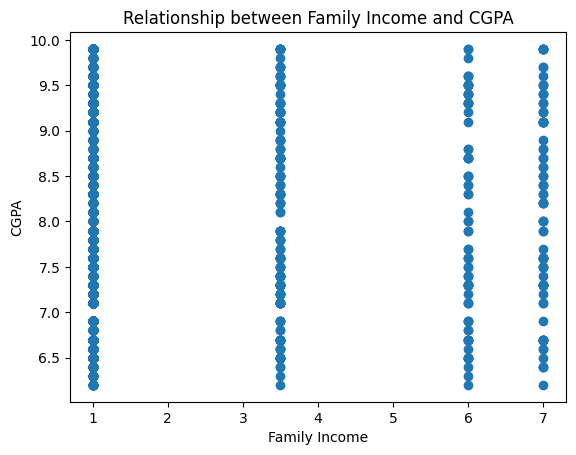

In [ ]:
plt.scatter(data['Numerical Family Income'], data['CGPA'])
plt.xlabel('Family Income')
plt.ylabel('CGPA')
plt.title('Relationship between Family Income and CGPA')
plt.show()

*The relationship with CGPA and the family income of the students is that as the family income goes on increasing, the students number decreases.*

**Moderate Questions**
10. How many students are from various cities? (Solve using data visualization tool)

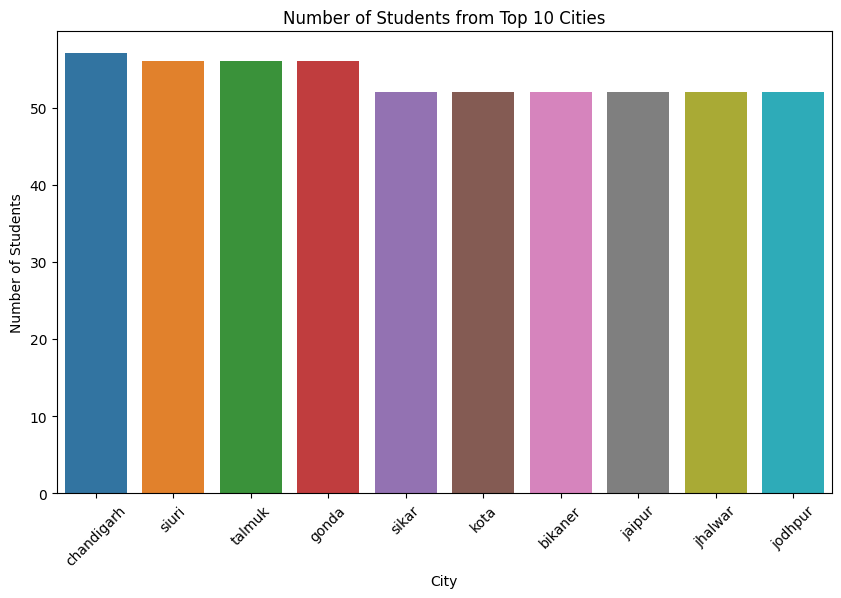

In [ ]:
# Calculate the number of students from each city
data['City'] = data['City'].str.lower()
city_distribution = data['City'].value_counts()

# Select only the top 10 cities
top_10_cities = city_distribution.head(10)

# Create a bar plot for the top 10 cities
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cities.index, y=top_10_cities.values)
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Number of Students')
plt.title('Number of Students from Top 10 Cities')
plt.show()

*There are around 50 students from the cities Chandigarh, Siuri, Talmuk, Gonda, Sikar, Kota, Bikaner, Jaipur, Jhalwar and Jodhpur.*

11. How does the expected salary vary based on factors like 'GPA', 'Family income', 'Experience with Python (Months)'?

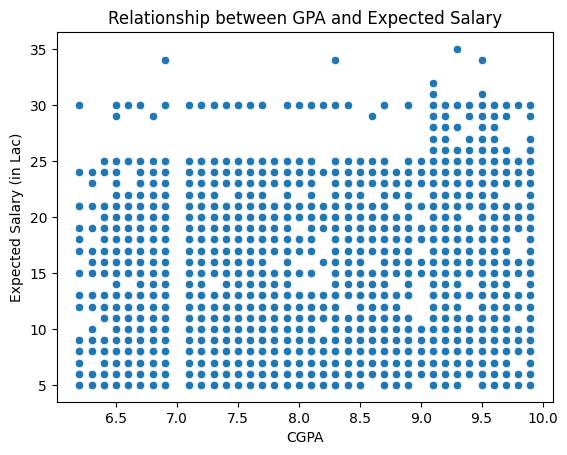

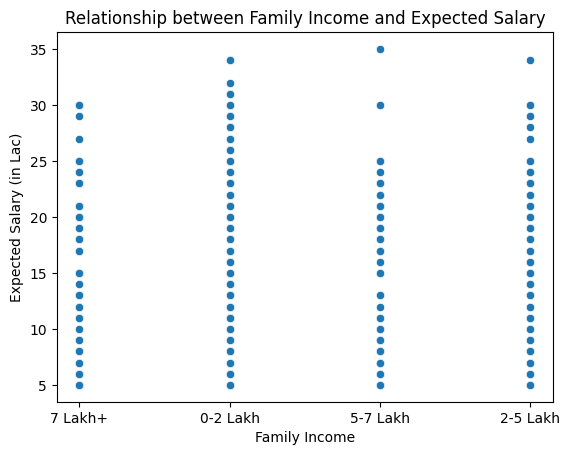

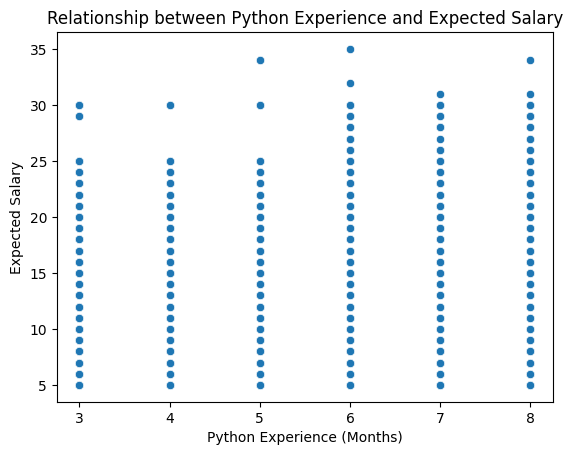

In [ ]:
sns.scatterplot(x='CGPA', y='Expected salary (Lac)', data=data)
plt.xlabel('CGPA')
plt.ylabel('Expected Salary (in Lac)')
plt.title('Relationship between GPA and Expected Salary')
plt.show()

sns.scatterplot(x='Family Income', y='Expected salary (Lac)', data=data)
plt.xlabel('Family Income')
plt.ylabel('Expected Salary (in Lac)')
plt.title('Relationship between Family Income and Expected Salary')
plt.show()

sns.scatterplot(x='Experience with python (Months)', y='Expected salary (Lac)', data=data)
plt.xlabel('Python Experience (Months)')
plt.ylabel('Expected Salary')
plt.title('Relationship between Python Experience and Expected Salary')
plt.show()

*The relationship between the expected salary and 'GPA', 'Family income', 'Experience with Python (Months) has been shown.*

12. Which event tends to attract more students from specific fields of study?

In [ ]:
# Calculate the count of students from each field of study attending each event
event_field_distribution = data.groupby(['Designation', 'Events']).size().unstack()

# Get the top 5 results
top_5_event_field_distribution = event_field_distribution.stack().reset_index(name='Count').nlargest(5, 'Count')

# Remove the index numbers
top_5_event_field_distribution.index = [''] * len(top_5_event_field_distribution)

print("12. Top 5 Event Attraction by Field of Study:\n", top_5_event_field_distribution)

12. Top 5 Event Attraction by Field of Study:
  Designation                                       Events  Count
    Students                  Product Design & Full Stack  842.0
    Students      Internship Program(IP) Success Conclave  545.0
    Students                       Art of Resume Building  478.0
    Students            Data Visualization using Power BI  455.0
    Students  Talk on Skill and Employability Enhancement  379.0


*The top events which attracts students are Product Design & Full Stack, Internship Program(IP) Success Conclave, Art of Resume Building, Data Visualization using Power BI and Talk on Skill and Employability Enhancement.*

13. Do students in leadership positions during their college years tend to have higher GPAs or better expected salary?

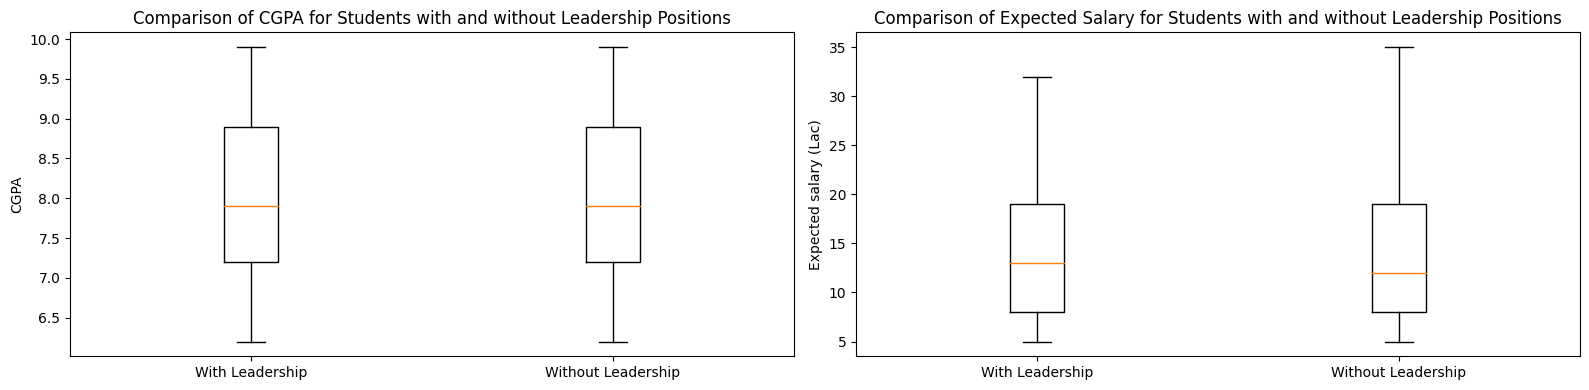

In [ ]:
# Create box plots to compare GPA and Expected Salary based on leadership positions
plt.figure(figsize=(16, 4))

# Box plot for GPA
plt.subplot(121)
plt.boxplot([data[data['Leadership- skills'] == 'yes']['CGPA'], data[data['Leadership- skills'] == 'no']['CGPA']],
            labels=['With Leadership', 'Without Leadership'])
plt.ylabel('CGPA')
plt.title('Comparison of CGPA for Students with and without Leadership Positions')

# Box plot for Expected Salary
plt.subplot(122)
plt.boxplot([data[data['Leadership- skills'] == 'yes']['Expected salary (Lac)'], data[data['Leadership- skills'] == 'no']['Expected salary (Lac)']],
            labels=['With Leadership', 'Without Leadership'])
plt.ylabel('Expected salary (Lac)')
plt.title('Comparison of Expected Salary for Students with and without Leadership Positions')

plt.tight_layout()
plt.show()

*Students in leadership positions during their college years tend to have higher GPAs over better expected salary.*

14. How many students are graduating by the end of 2024?

In [ ]:
graduating_by_2024 = data[data['Year of Graduation'] <= 2024]['First Name'].nunique()
print("14. Students Graduating by 2024:", graduating_by_2024)

14. Students Graduating by 2024: 1761


*There are 1761 students graduating by 2024.*

15. Which promotion channel brings in more student participations for the event?

In [ ]:
# Calculate the promotion channel distribution
promotion_channel_distribution = data['How did you come to know about this event?'].value_counts()

# Find the top promotion channel and its count
top_promotion_channel = promotion_channel_distribution.head(1)

print("15. Top Promotion Channel and Count:\n", top_promotion_channel)

15. Top Promotion Channel and Count:
 Whatsapp    1067
Name: How did you come to know about this event?, dtype: int64


*Whatsapp is the promotion channel that brings in more student participations for the event.*

16. Find the total number of students who attended the events related to Data Science? (From all Data Science related courses.)

In [ ]:
data_science_events = data[data['Events'].str.contains('Data', case=False, na=False)]
total_data_science_students = data_science_events['First Name'].nunique()
print("16. Total Students Attending Data Science Events:", total_data_science_students)

16. Total Students Attending Data Science Events: 592


*There are 592 students who attended the events related to Data Science.*

17. Those who have high CGPA & More experience in language those who had high expectations for salary? (Avg)

In [ ]:
high_gpa_experience_salary = data[(data['CGPA'] > data['CGPA'].median()) &
                                  (data['Experience with python (Months)'] > data['Experience with python (Months)'].median())]['Expected salary (Lac)'].mean()
print("17. Avg Expected Salary for High CGPA and Python Experience Students:", high_gpa_experience_salary)

17. Avg Expected Salary for High CGPA and Python Experience Students: 16.720192307692308


*Average expected salary for high CGPA and python experience students is 16.720192307692308.*

18. How many students know about the event from their colleges? Which of these Top 5 colleges?

In [ ]:
# Convert the 'College Name' column to lowercase
data['College Name'] = data['College Name'].str.lower()

# Calculate the college event distribution, treating case-insensitive
college_event_distribution = data[data['Specify in "Others" (how did you come to know about this event)'] == 'College']['College Name'].value_counts().nlargest(5)

print("18. Students Knowing About Event from Colleges (Top 5 Colleges):\n", college_event_distribution)

18. Students Knowing About Event from Colleges (Top 5 Colleges):
 wilson college                                             9
vidyalankar institute of technology, mumbai                5
government polytechnic gandhinagar                         5
g h raisoni institut of engineering and technology pune    5
vishwakarma institute of technology, pune                  5
Name: College Name, dtype: int64


*There are 9, 5, 5, 5, 5, 5 counts of student from the Wilson College, Vidyalankar Institute of Technology, Government Polytechnic, G. H. Raisoni Institute of Engineering and Technology and Vishwakarma Institute of Technology respectively, who know about the events from the colleges.*